In [136]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
#load data
content_df = pd.read_csv('/Users/damiresflores/Desktop/acenture/Content.csv',index_col=0)
content_df.head()

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [138]:
#Check values in category columns
content_df['Category'].value_counts()

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

<li>Here we can see that there are some inconsistency with ponctuation and capitalization. The following code will remove those.

In [139]:
content_df['Category'] = content_df['Category'].apply(lambda x:x.strip('"').lower())
content_df['Category'].value_counts()

Category
technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: count, dtype: int64

In [140]:
#load reactions dataset:
reactions_df = pd.read_csv('/Users/damiresflores/Desktop/acenture/Reactions.csv',index_col=0)


#rename type to reaction type column
reactions_df.rename(columns={"Type":'Reaction_Type'},inplace=True)
reactions_df.head()   
     

,Content ID,Reaction_Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/20 09:43
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/21 12:22
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/21 05:13
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/21 19:13
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/20 12:25


In [141]:
#load reaction types Dataset
reactiontypes_df = pd.read_csv('/Users/damiresflores/Desktop/acenture/ReactionTypes.csv',index_col=0)
reactiontypes_df.rename(columns={'Type':'Reaction_Type'},inplace=True)
reactiontypes_df.head()

,Reaction_Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [142]:
reactiontypes_df.describe()

,Score
count,16.000000
mean,39.625000
std,26.901983
min,0.000000
25%,14.250000
50%,40.000000
75%,66.250000
max,75.000000


In [143]:
reactiontypes_df.value_counts()

Reaction_Type  Sentiment  Score
adore          positive   72       1
cherish        positive   70       1
disgust        negative   0        1
dislike        negative   10       1
hate           negative   5        1
heart          positive   60       1
indifferent    neutral    20       1
interested     positive   30       1
intrigued      positive   45       1
like           positive   50       1
love           positive   65       1
peeking        neutral    35       1
scared         negative   15       1
super love     positive   75       1
want           positive   70       1
worried        negative   12       1
Name: count, dtype: int64

<li>At this point we have a clean dataset, based on the client's specifications (remove rows with missing values, drop unnecessary colunmns, and ensure data types match the column values).

<h1>Creating a joined table for analysis (Data Modelling)</h1>

In [144]:
top_performers = reactions_df.merge(content_df,on='Content ID')
top_performers
     

,Content ID,Reaction_Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/20 09:43,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/21 12:22,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/21 05:13,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/21 19:13,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/20 12:25,photo,studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,6/27/20 09:46,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2/16/21 17:17,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,9/12/20 03:54,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,11/4/20 20:08,audio,technology


In [145]:
#merge tables on type column
top_performers = top_performers.merge(reactiontypes_df,on='Reaction_Type')
top_performers

,Content ID,Reaction_Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/20 09:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/21 19:13,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,4/9/21 02:46,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,3/28/21 21:15,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,8/4/20 05:40,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,10/4/20 22:26,audio,veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,9/18/20 10:50,audio,veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,10/31/20 03:58,GIF,culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,6/25/20 15:12,GIF,culture,positive,72


<h1>Top Category Analysis</h1>
<p> <li>We have 24573 rows of data. Let's use this merged table to answer the business question regarding the top five categories with the largest aggregate popularity.</p>
<p> <li>The client provided the "score" column, which can be used as a measure of popularity. To find the highest popularity for each category, we simply have to sum this value by category.</p>

In [146]:
#group by category and calculate total score
category_scores = top_performers.groupby('Category')['Score'].sum()
category_scores_df = category_scores.reset_index()

# Sort the DataFrame by the 'Score' column in descending order and display the top 5 categories
top_5_categories = category_scores_df.sort_values(by='Score', ascending=False)
category_scores_df = category_scores.reset_index()
category_scores_df.head(20)
     

,Category,Score
0,animals,74965
1,cooking,64756
2,culture,66579
3,dogs,52511
4,education,57436
5,fitness,55323
6,food,66676
7,healthy eating,69339
8,public speaking,49264
9,science,71168


<h4>There's our answer - the top five categories by aggregate popularity are animals, science, healthy eating, technology and food.</h4>

In [153]:
#export clean dataset to share with client.
top_performers.to_csv('client_data.csv')


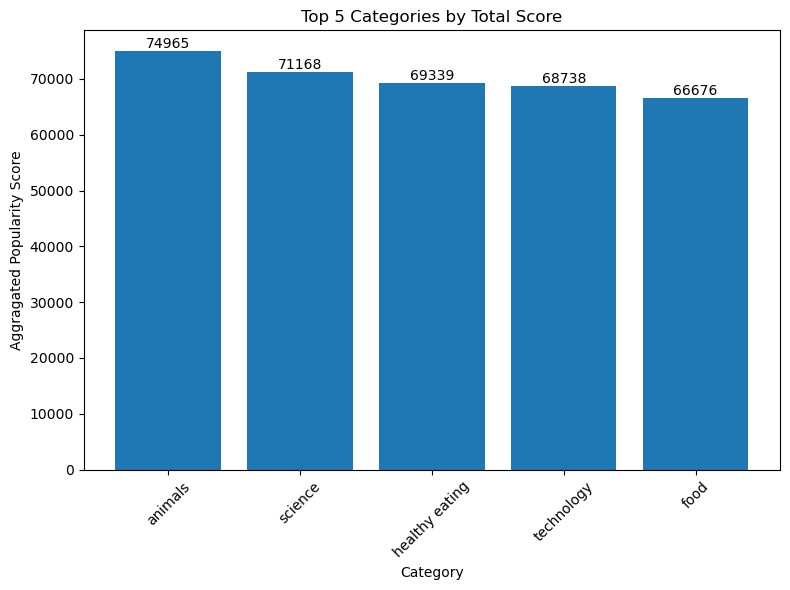

In [148]:
import matplotlib.pyplot as plt

top_5_categories = category_scores_df.sort_values(by='Score', ascending=False).head(5)

# Plotting the top 5 categories by total score with custom colors
plt.figure(figsize=(8, 6))
bars = plt.bar(top_5_categories['Category'], top_5_categories['Score']) 
plt.xlabel('Category')
plt.ylabel('Aggragated Popularity Score')
plt.title('Top 5 Categories by Total Score')
plt.xticks(rotation=45)
plt.tight_layout()


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             round(bar.get_height(), 2), ha='center', va='bottom')

plt.show()



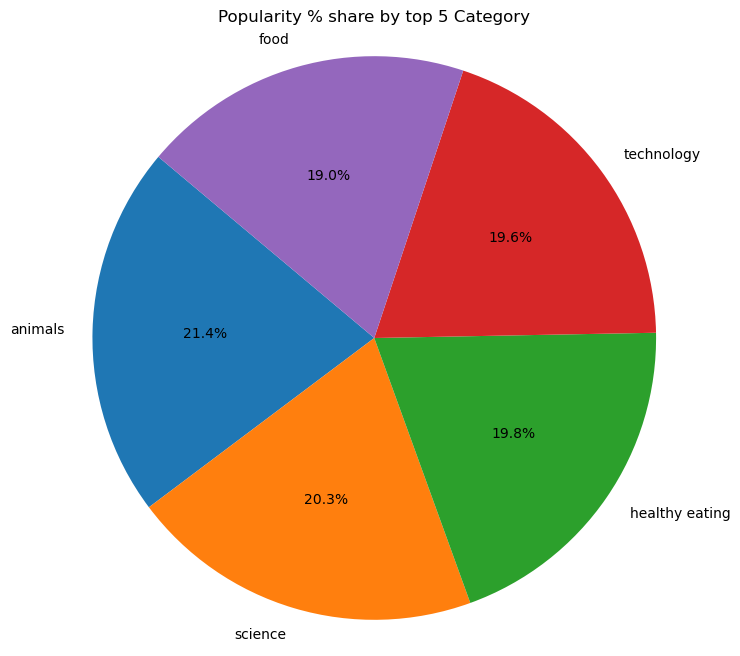

In [149]:
plt.figure(figsize=(8, 8))
plt.pie(top_5_categories['Score'], labels=top_5_categories['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Popularity % share by top 5 Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

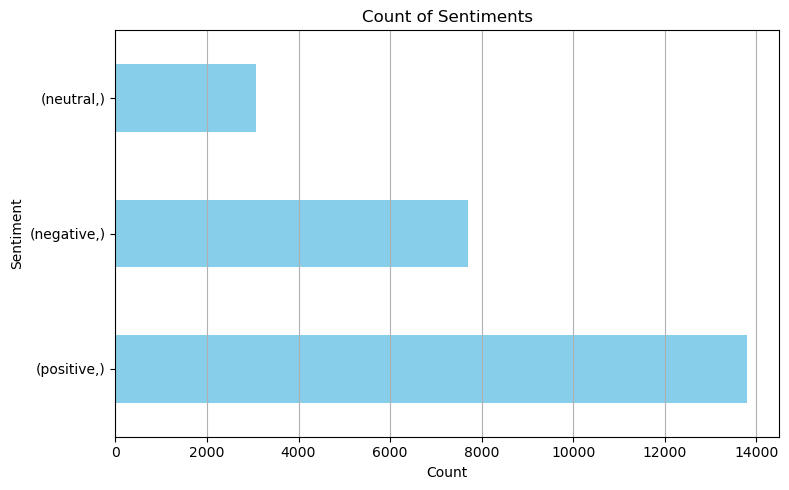

In [150]:
sentiment = pd.DataFrame(top_performers['Sentiment'])
sentiment_counts = sentiment.value_counts()
sentiment_counts


# Plotting horizontally
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='barh', color='skyblue')

# Formatting the plot
plt.title('Count of Sentiments')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.grid(axis='x')  # Show grid lines along x-axis

plt.tight_layout()
plt.show()

   Month_Year  Score
9    May-2021  86293
4    Jan-2021  82938
11   Oct-2020  82810
5    Jul-2020  82464
10   Nov-2020  82333
1    Aug-2020  82176
2    Dec-2020  81163
12   Sep-2020  80077
8    Mar-2021  78915
0    Apr-2021  78598
3    Feb-2021  75509
7    Jun-2021  44963
6    Jun-2020  35406


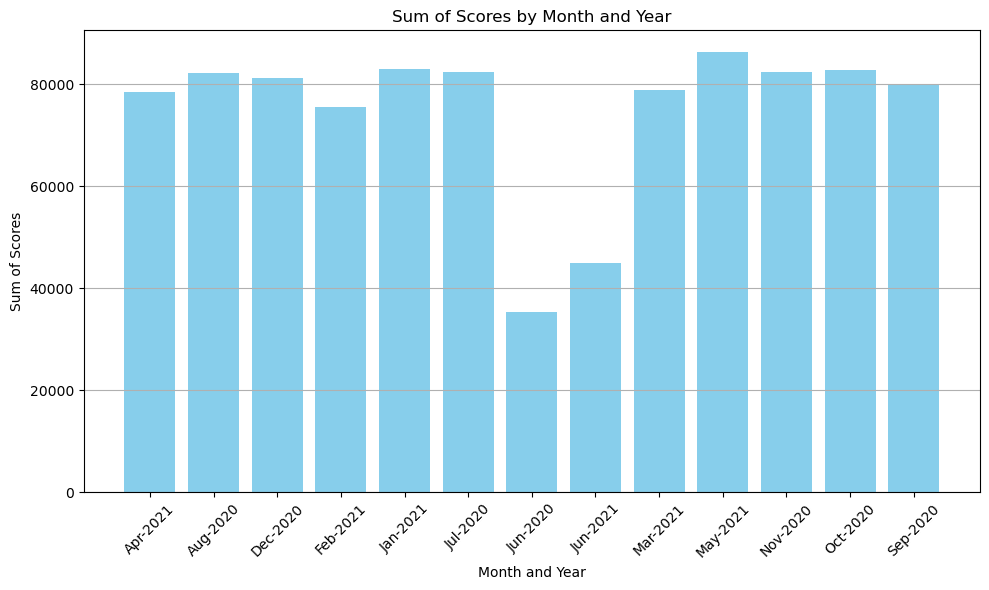

In [151]:

top_performers['Datetime'] = pd.to_datetime(top_performers['Datetime'], format='%m/%d/%y %H:%M')

top_performers['Month_Year'] = top_performers['Datetime'].dt.strftime('%b-%Y')

# Group by 'Month_Year' and calculate the sum of 'Score'
monthly_scores = top_performers.groupby('Month_Year')['Score'].sum().reset_index()

# Print the resulting DataFrame
print(monthly_scores.sort_values(by='Score', ascending=False))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_scores['Month_Year'], monthly_scores['Score'], color='skyblue')

# Formatting the plot
plt.title('Sum of Scores by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Sum of Scores')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()